<a href="https://colab.research.google.com/github/sarvagna13/Linear-Regression/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color='white' face='comic sans ms'> Salary Prediction</font></center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the data set
salary_org = pd.read_csv("train.csv")

# Print top 5 rows of dataset
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [ ]:
# Check the info of data set
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [ ]:
# Create a copy of data set
salary_cpy = salary_org.copy()

In [ ]:
# Check column names
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [ ]:
# Remove leading and trailing edges
salary_cpy.columns = salary_cpy.columns.str.strip()

# print coloumns after stripping spaces
print("After Removing leading and trailing spaces ",  salary_cpy.columns)

After Removing leading and trailing spaces  Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


In [ ]:
# Check Null Values in data set
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Remove rows having empty hire date
salary_cpy = salary_cpy.dropna(subset=['HireDate'])

# Check null Values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [ ]:
# Drop Gross Pay column
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

# Check null Values
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [ ]:
# Removing $ from Annual Salary and converting it into Integer format
salary_cpy['AnnualSalary'] = salary_cpy['AnnualSalary'].apply(lambda x : (float)(str(x)[1:]))

In [ ]:
#Value counts on Annual Salary
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
26774.0       1
81120.0       1
44000.0       1
58041.0       1
83370.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [ ]:
salary_cpy['HireDay'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[3:5])))
salary_cpy['HireMonth'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[0:2])))
salary_cpy['HireYear'] = salary_cpy['HireDate'].apply(lambda x : (int)(str(x[6:])))

# Print info to check whether columns are added
salary_cpy.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).strip().replace("  "," "))
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).strip().replace("  "," "))

In [ ]:
# Trim spaces
salary_cpy['JobTitle'] = salary_cpy['JobTitle'].apply(lambda x : str(x).upper())
salary_cpy['AgencyID'] = salary_cpy['AgencyID'].apply(lambda x : str(x).upper())
salary_cpy['Agency'] = salary_cpy['Agency'].apply(lambda x : str(x).upper())

<AxesSubplot:>

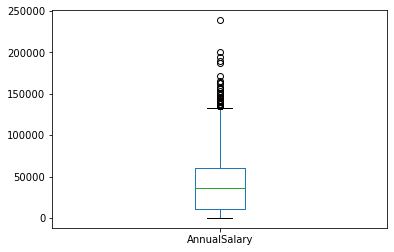

In [ ]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

In [ ]:
# SUMMARY STATS OF AnnualSalary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

The max value way more than mean , median .



In [ ]:
salary_cpy = salary_cpy[salary_cpy['AnnualSalary']<150000]
salary_cpy.shape

(18895, 9)

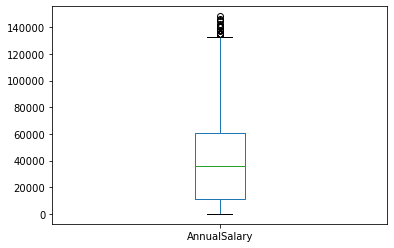

In [ ]:
# Create Box Plot for Annual Salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

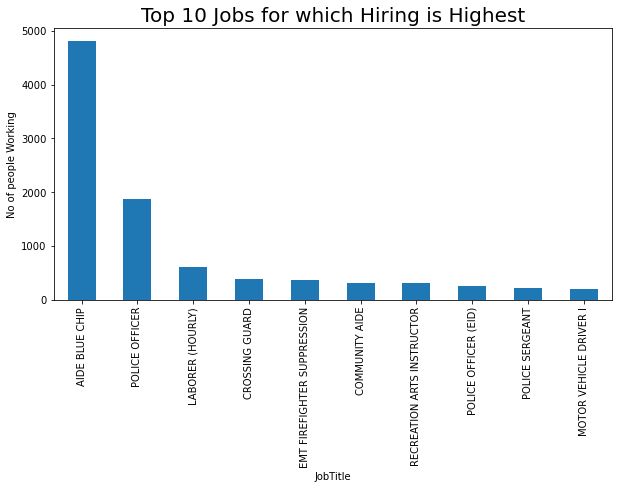

In [ ]:
#Top 10 Jobs that based on hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No of people Working')
plt.title("Top 10 Jobs for which Hiring is Highest",fontsize=20)
plt.show()

- The above plot clearly shows more number of People are working as AIDE BLUE CHIP which  has over double the workers working as POLICE OFFICER which is second Highest
- All the remaining JobTitles have less than 1000 Workers 

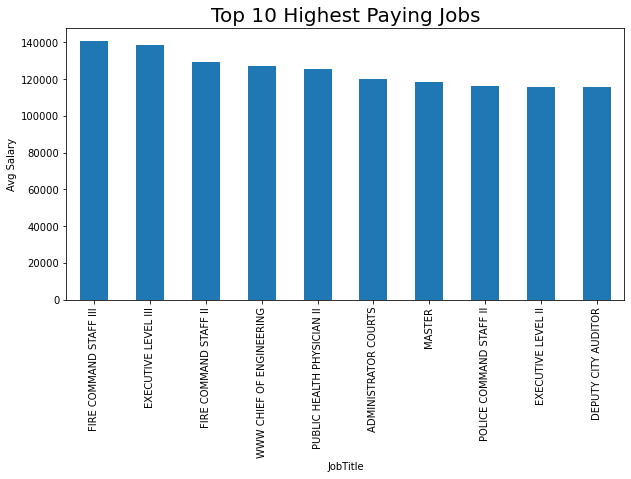

In [ ]:
#Top 10 Jobs that fetche highest Salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Avg Salary')
plt.title("Top 10 Highest Paying Jobs",fontsize=20)
plt.show()

 - The above plot clearly shows top 10 Jobs which fetch the highest Salary.

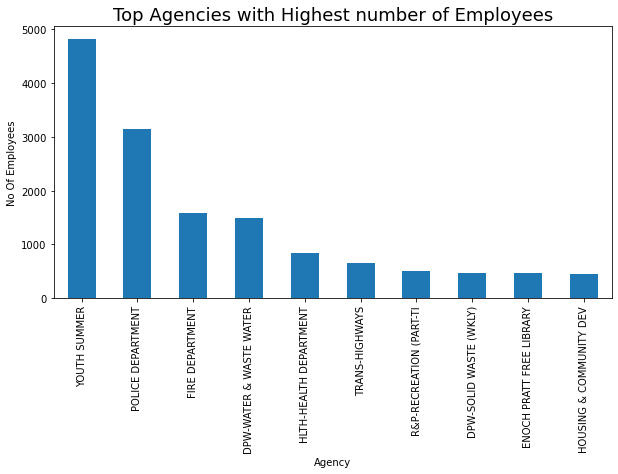

In [ ]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top Agencies with Highest number of Employees",fontsize=18)
plt.show()

 - The Youth Summer has maximum number of employees followed by Police Department
 - Fire Department and DPW - Water & Waste Water has almost same number of employees

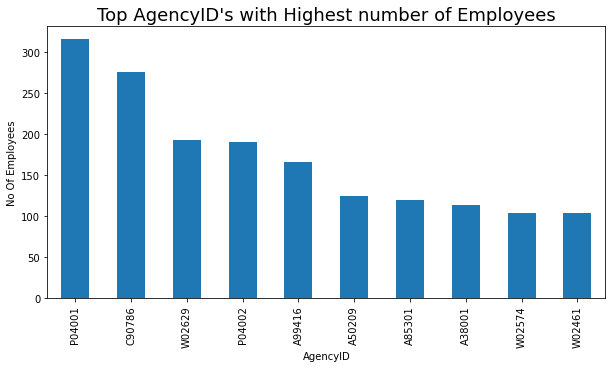

In [ ]:
#Top 10 Jobs that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No Of Employees')
plt.title("Top AgencyID's with Highest number of Employees",fontsize=18)
plt.show()

 - The P04001 has maximum number of employees followed by C90786

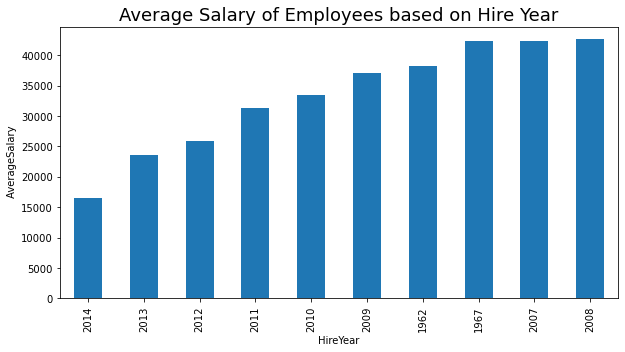

In [ ]:
# Salary vs Hire Year
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].mean().sort_values().head(10).plot.bar()
plt.ylabel(' AverageSalary')
plt.title("Average Salary of Employees based on Hire Year",fontsize=18)
plt.show()

 - The trend above Suggests that the Salary of the employees increases with experience in the company. So now lets calculate experience in days with Agency.

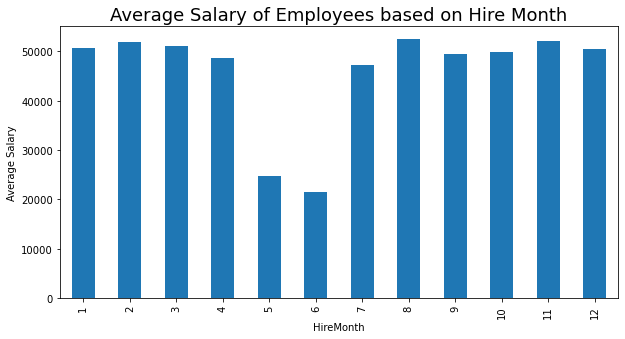

In [ ]:
# Checking if Month hired has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].mean().plot.bar()
plt.ylabel('Average Salary')
plt.title("Average Salary of Employees based on Hire Month",fontsize=18)
plt.show()

- Except in Months 5 and 6 the distribution is same throughout.
- This might be because big agencies donot hire during that time

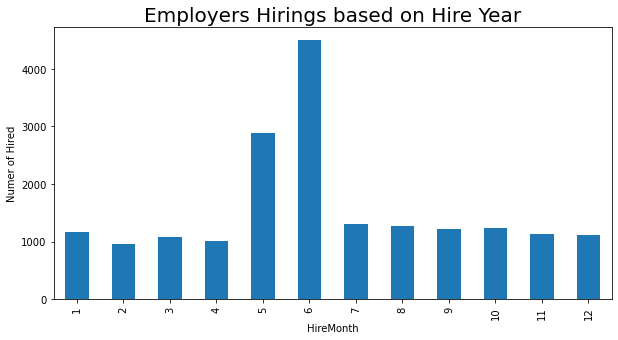

In [ ]:
# Checking on which Month most people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['Name'].count().plot.bar()
plt.ylabel('Numer of Hired')
plt.title("Employers Hirings based on Hire Year",fontsize=20)
plt.show()

 -  More members are being hired in months of May and June but they have relatively lower average salaries

In [ ]:
# Apply mean encoding for Job Title
mean_Job = salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle'] = salary_master['JobTitle'].map(mean_Job)

print(salary_master['JobTitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for Agency
mean_agency = salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency'] = salary_master['Agency'].map(mean_agency)

print(salary_master['Agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [ ]:
# Apply mean encoding for AgencyID
mean_agencyID = salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID'] = salary_master['AgencyID'].map(mean_agencyID)

print(salary_master['AgencyID'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


We have converted all the required categorical variables to Numerical variables. Lets check the info to check if trhere are any non-numeric variables

In [ ]:
# Check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
# Drop Name, HireDate column
salary_master = salary_master.drop(['HireDate','Name'],axis=1)

# Check Info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


In [ ]:
# Split data into train and test sets
salary_train, salary_test = train_test_split(salary_master,train_size=0.7, random_state=42)

In [ ]:
# Shape of train set
print(salary_train.shape)

# Shape of test set
print(salary_test.shape)

(13226, 7)
(5669, 7)


In [ ]:
# Divide tarin set into Dependent and independent variables
y_train = salary_train.pop('AnnualSalary')

X_train = salary_train


# Divide test set into Dependent and independent variables
y_test = salary_test.pop('AnnualSalary')

X_test = salary_test

In [ ]:
# Scale the train
scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,3.410750e-16,-2.445580e-16,-3.068769e-16,-1.107999e-16,-4.932039e-17,1.091302e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [ ]:
# # Scale the test
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

X_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


#### Let's see how a Linear Regression Works

In [ ]:
# A sample Data Frame
example_df = pd.DataFrame({'Performance' : [1,2,3,4,5,6], 'Grade':[2,5,4,6,1,3],'Target':[100,300,200,600,200,600]})
example_df

,Performance,Grade,Target
0,1,2,100
1,2,5,300
2,3,4,200
3,4,6,600
4,5,1,200
5,6,3,600


In [ ]:
# Create a model by creating a Linear Regression Object
example_lr = LinearRegression()

example_model = example_lr.fit(example_df[['Performance','Grade']],example_df['Target'])

In [ ]:
# Lets have a look at coefficients as described
print(example_lr.coef_)
print(example_lr.intercept_)

[85. 75.]
-226.66666666666669


In [ ]:
# Calculate R-squared
example_model.score(example_df[['Performance','Grade']],example_df['Target'])

0.8271428571428571

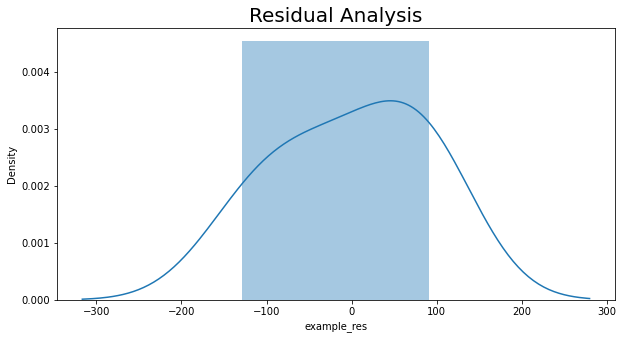

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
target_pred = example_model.predict(example_df[['Performance','Grade']])
example_res = example_df['Target'] - target_pred
sns.distplot(example_res)
plt.xlabel('example_res')
plt.title("Residual Analysis",fontsize=20)
plt.show()

As can be seen Error Terms are Normally Distributed

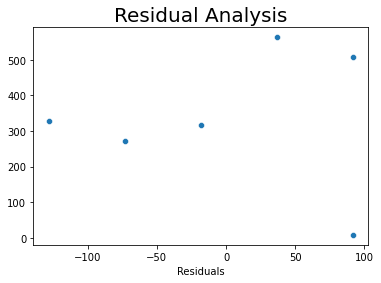

In [ ]:
sns.scatterplot(x=example_res,y=target_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

In [ ]:
# Build the model
lr = LinearRegression()

salary_reg = lr.fit(X_train,y_train)

In [ ]:
# Verify the r2 score
salary_reg.score(X_train,y_train)

0.964833881870778

In [ ]:
# r2 for test data
salary_reg.score(X_test,y_test)

0.9634621082754347

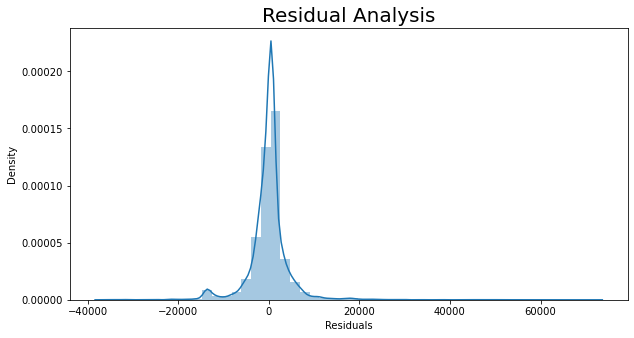

In [ ]:
# Plot Distribution plot of Residuals
plt.figure(figsize=(10,5))
y_train_pred = salary_reg.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residual terms are normally distributed with mean at 0, which is one of the Assumption of Linear Regression

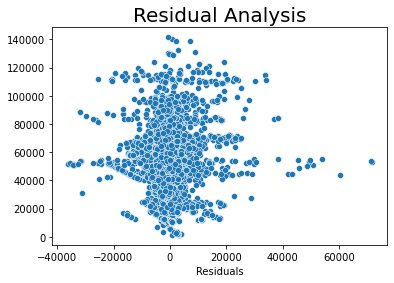

In [ ]:
sns.scatterplot(x=res,y=y_train_pred)
plt.xlabel('Residuals')
plt.title("Residual Analysis",fontsize=20)
plt.show()

 - The Residuals are independent of each other ,which is another assumption in Linear Regression

In [ ]:
# Print coef
print("Coef are:",salary_reg.coef_)

#print intercept
print("Intercept is",salary_reg.intercept_)

Coef are: [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
Intercept is 39628.221303493134


In [ ]:
model = str(salary_reg.intercept_)

for i in range(len(salary_reg.coef_)):
    model = model +' + '  +(str(salary_reg.coef_[i])) + ' * ' +(str(X_train.columns[i]))
print(model)

39628.221303493134 + 22395.65357851075 * JobTitle + 2798.6775282355734 * AgencyID + -1694.5599365882206 * Agency + -22.591564342892955 * HireDay + -62.65873075557645 * HireMonth + -2049.216012557781 * HireYear


#### <i><font color='' face='Cursive'>Observations from Model:</font></i>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.